--- Análisis de Información del DataFrame ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature_1  300 non-null    float64
 1   feature_2  300 non-null    float64
 2   target     300 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 7.2 KB

--- Estadísticas Descriptivas de las Características Numéricas ---
        feature_1   feature_2      target
count  300.000000  300.000000  300.000000
mean     0.500660    0.255113    0.500000
std      0.874055    0.499857    0.500835
min     -1.178231   -0.628999    0.000000
25%     -0.082875   -0.192738    0.000000
50%      0.462349    0.254508    0.500000
75%      1.073926    0.719840    1.000000
max      2.214711    1.187079    1.000000

--- Conteo de Clases Reales (Lunas) ---
target
1    150
0    150
Name: count, dtype: int64


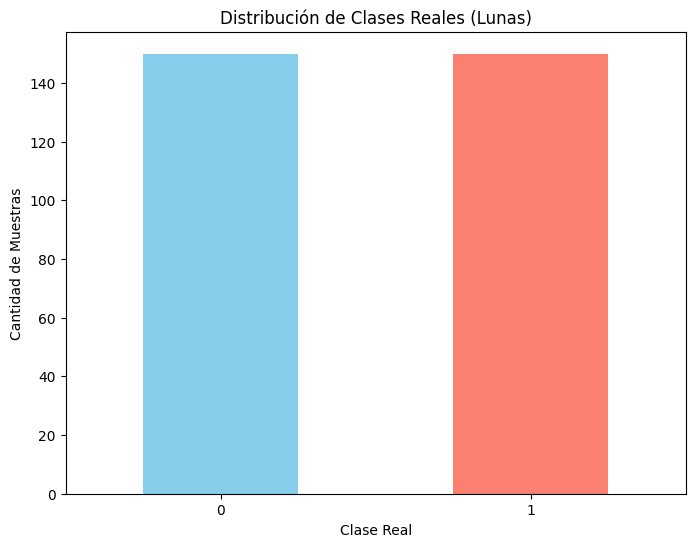


--- Matriz de Correlación ---


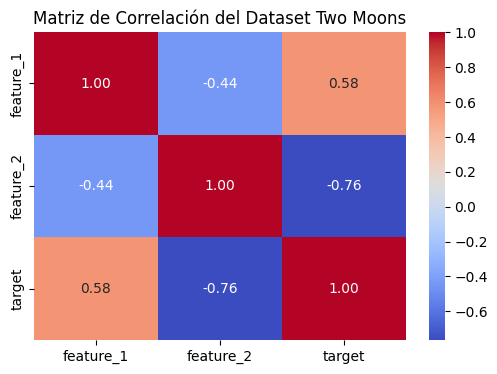


--- Visualización de la Distribución de Variables Clave ---


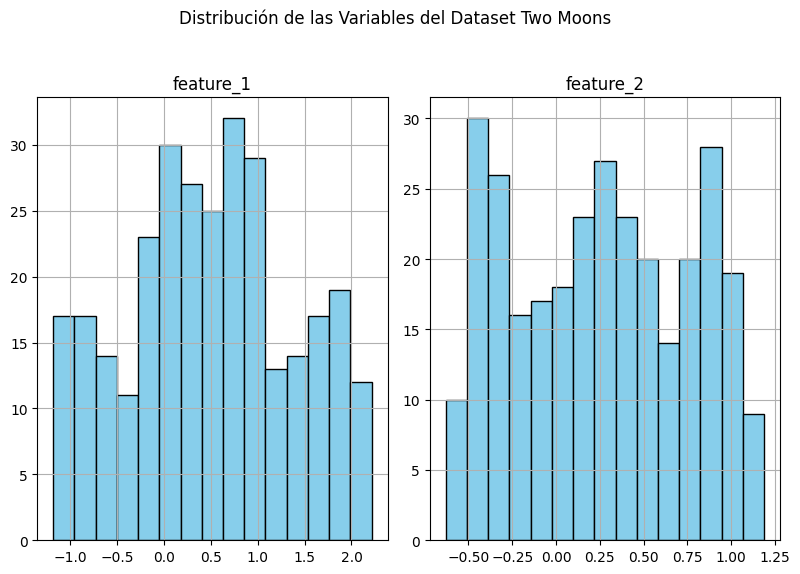

/tmp/ipykernel_145907/4082096055.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y='feature_1', data=df, palette='Set2')


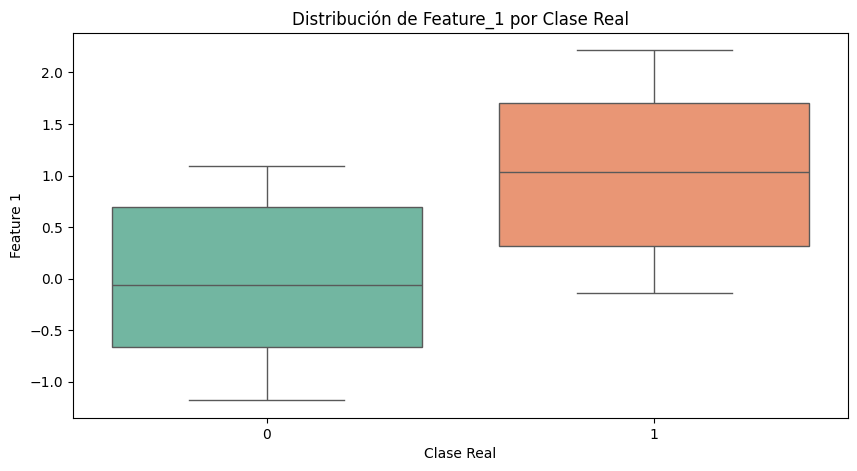

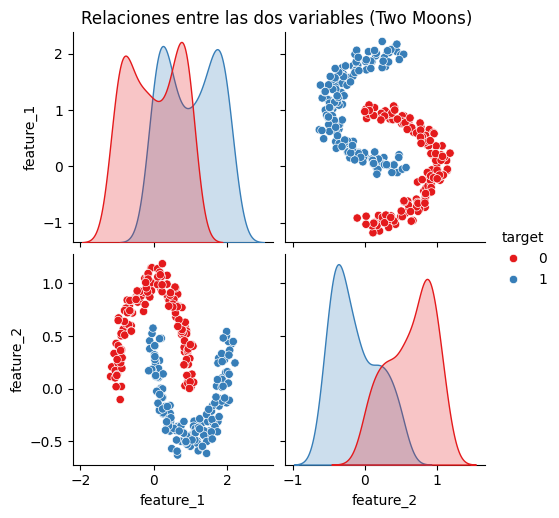


ANOVA en feature_1 entre clases: F = 152.13, p = 0.00000


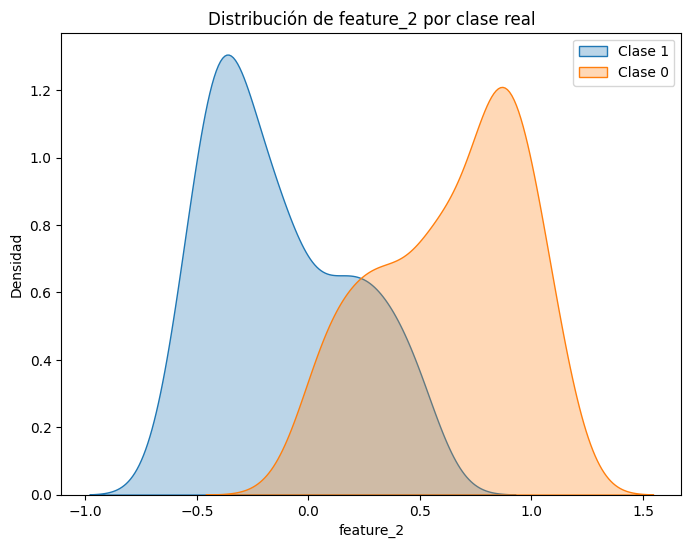

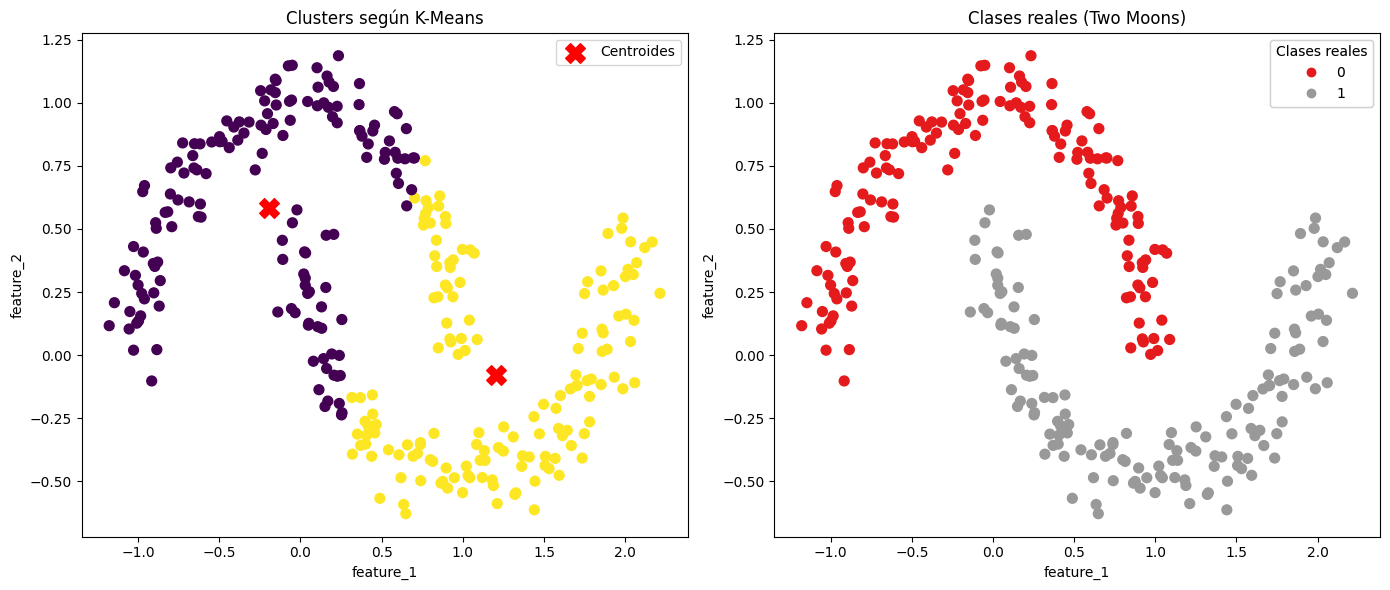

El nuevo registro [0.5, 0.2] pertenece al cluster: 1
Silhouette Score: 0.48359040157792266
Adjusted Rand Index: 0.2610397820969751
Homogeneity: 0.19947177920313955
Completeness: 0.19947817449880412
V-Measure: 0.19947497679971254


In [1]:
# ============================================
# Ejemplo de clustering problemático con K-Means
# Dataset: Two Moons (make_moons)
# ============================================

from sklearn.datasets import make_moons
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# 1. Generar el dataset y crear un DataFrame
X, y_true = make_moons(n_samples=300, noise=0.08, random_state=42)
df = pd.DataFrame(X, columns=["feature_1", "feature_2"])
df["target"] = y_true

print("--- Análisis de Información del DataFrame ---")
df.info()

# 2. Estadísticas Descriptivas de las Características Numéricas
print("\n--- Estadísticas Descriptivas de las Características Numéricas ---")
print(df.describe())

# 3. Análisis de la variable objetivo (target)
print("\n--- Conteo de Clases Reales (Lunas) ---")
print(df['target'].value_counts())

plt.figure(figsize=(8, 6))
df['target'].value_counts().sort_index().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribución de Clases Reales (Lunas)')
plt.xlabel('Clase Real')
plt.ylabel('Cantidad de Muestras')
plt.xticks(rotation=0)
plt.show()

# 4. Matriz de correlación y visualización con Heatmap
print("\n--- Matriz de Correlación ---")
correlation_matrix = df.corr()

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación del Dataset Two Moons')
plt.show()

# 5. Histograma para visualizar la distribución de características
print("\n--- Visualización de la Distribución de Variables Clave ---")
df[["feature_1", "feature_2"]].hist(figsize=(8, 6), bins=15, color='skyblue', edgecolor='black')
plt.suptitle('Distribución de las Variables del Dataset Two Moons')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# 6. Boxplots para comparar distribuciones entre clases
plt.figure(figsize=(10, 5))
sns.boxplot(x='target', y='feature_1', data=df, palette='Set2')
plt.title("Distribución de Feature_1 por Clase Real")
plt.xlabel("Clase Real")
plt.ylabel("Feature 1")
plt.show()

# 7. Pairplot (gráfico de dispersión cruzado entre variables)
sns.pairplot(df, hue="target", diag_kind="kde", palette="Set1")
plt.suptitle("Relaciones entre las dos variables (Two Moons)", y=1.02)
plt.show()

# 8. Análisis de varianza (ANOVA simplificado)
from scipy.stats import f_oneway
f_stat, p_val = f_oneway(df[df['target'] == 0]['feature_1'], df[df['target'] == 1]['feature_1'])
print(f"\nANOVA en feature_1 entre clases: F = {f_stat:.2f}, p = {p_val:.5f}")

# 9. Visualización de densidad de una variable
plt.figure(figsize=(8,6))
for t in df['target'].unique():
    subset = df[df['target']==t]
    sns.kdeplot(subset['feature_2'], label=f"Clase {t}", fill=True, alpha=0.3)
plt.title("Distribución de feature_2 por clase real")
plt.xlabel("feature_2")
plt.ylabel("Densidad")
plt.legend()
plt.show()


# CLASIFICACIÓN

# 1. Cargar el dataset real
X_plot = df[["feature_1", "feature_2"]].values
y_true = df["target"].values

# 2. Aplicar K-Means con 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_plot)
y_kmeans = kmeans.predict(X_plot)

# 3. Visualización comparativa
fig, axes = plt.subplots(1, 2, figsize=(14,6))

# (a) Clusters de K-Means
scatter1 = axes[0].scatter(X_plot[:, 0], X_plot[:, 1], c=y_kmeans, cmap="viridis", s=50)
centers = kmeans.cluster_centers_
axes[0].scatter(centers[:, 0], centers[:, 1], c="red", s=200, marker="X", label="Centroides")
axes[0].set_title("Clusters según K-Means")
axes[0].set_xlabel("feature_1")
axes[0].set_ylabel("feature_2")
axes[0].legend()

# (b) Clases reales
scatter2 = axes[1].scatter(X_plot[:, 0], X_plot[:, 1], c=y_true, cmap="Set1", s=50)
legend2 = axes[1].legend(*scatter2.legend_elements(), title="Clases reales")
axes[1].add_artist(legend2)
axes[1].set_title("Clases reales (Two Moons)")
axes[1].set_xlabel("feature_1")
axes[1].set_ylabel("feature_2")

plt.tight_layout()
plt.show()

# 5. Clasificar un nuevo registro
nuevo_registro = np.array([[0.5, 0.2]])  # punto en la zona de intersección
cluster_predicho = kmeans.predict(nuevo_registro)
print(f"El nuevo registro {nuevo_registro.tolist()[0]} pertenece al cluster: {cluster_predicho[0]}")

# silhouette_score
sil_score = silhouette_score(X_plot, y_kmeans)
print("Silhouette Score:", sil_score)

# Adjusted Rand Index
from sklearn.metrics import adjusted_rand_score
ari = adjusted_rand_score(y_true, y_kmeans)
print("Adjusted Rand Index:", ari)

# Homogeneity, Completeness, V-Measure
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score
print("Homogeneity:", homogeneity_score(y_true, y_kmeans))
print("Completeness:", completeness_score(y_true, y_kmeans))
print("V-Measure:", v_measure_score(y_true, y_kmeans))
